In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn
from matplotlib import pyplot as plt

In [2]:
n = pn.PointData()
n['a'] = np.arange(10)
n['b'] = np.arange(20).reshape(-1,2)

In [3]:
n

a,0,1,2,3,4,5,6,7,8,9
b,[0 1],[2 3],[4 5],[6 7],[8 9],[10 11],[12 13],[14 15],[16 17],[18 19]


In [4]:
g = pn.GridData()

In [5]:
g['a'] = np.arange(10)

adding default grid


In [6]:
d = {'a':0}

In [7]:
list(d.items())[0]

('a', 0)

In [8]:
#g.grid['x'] = 33

In [9]:
g['b'] = np.arange(30).reshape(10,-1)

In [10]:
g

x,0,1,2,3,4,5,6,7,8,9
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [11]:
g.flat('b')

masked_array(
  data=[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]],
  mask=False,
  fill_value=999999)

In [12]:
g.grid.size

10

In [13]:
g

x,0,1,2,3,4,5,6,7,8,9
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [14]:
g['b'].ndim

2

In [15]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

In [16]:
g = pn.GridData()

g['bw'] = np.average(img, axis=-1).T[:,::-1] / 255
g['img'] = img.swapaxes(0,1)[:,::-1,:] / 255.

adding default grid


In [17]:
g.grid.vars

['x', 'y']

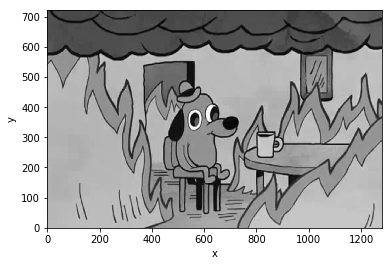

In [18]:
g.plot('bw', cmap='gray')

In [19]:
g.shape[3:]

()

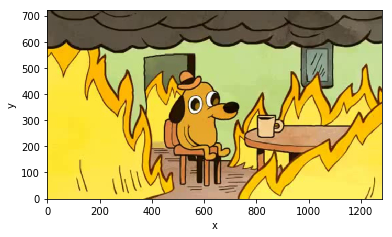

In [20]:
g.binwise(function='mean', x=0.5, y=0.5).plot('img')

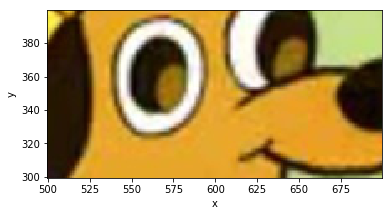

In [21]:
g[500:700, 300:400].plot('img')

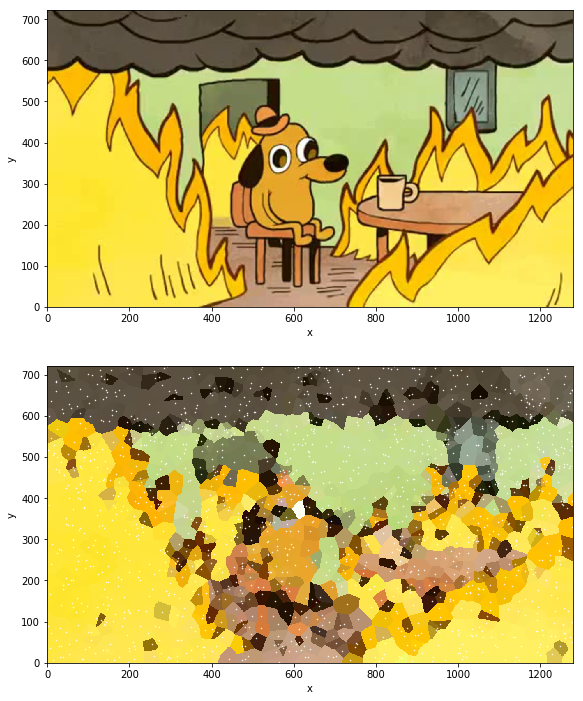

In [23]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=1500
pd = pn.PointData(x=np.random.rand(N)*g.grid['x'].edges.max(), y=np.random.rand(N)*g.grid['y'].edges.max())
g.lookup(pd).interp(g, method='nearest').plot('img', ax=ax[1])
pd.plot('x', 'y', '.', color='w', ax=ax[1], ms=1)

In [24]:
#%%timeit
#g.lookup(pd).interp(g, method='nearest')

3.45 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
g.vars

['x', 'y', 'bw', 'img', 'voronoi']

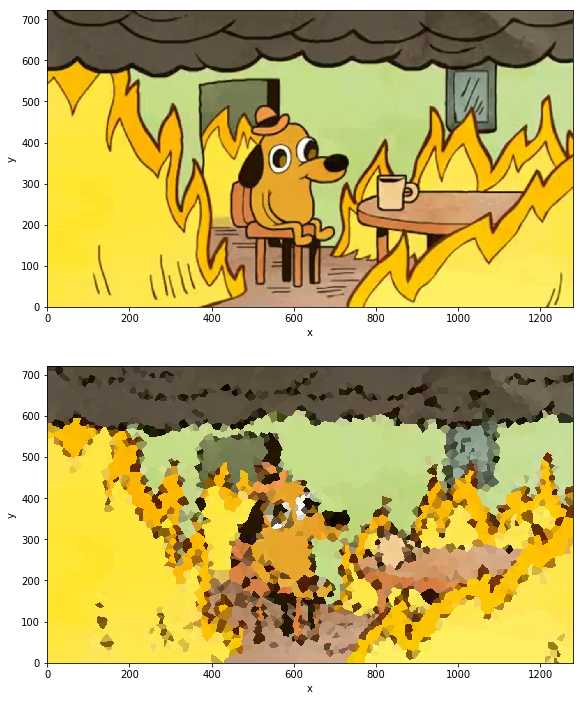

In [29]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=5000
pd = pn.PointData()
pd['x'] = np.random.rand(N)*g.grid['x'].edges.max()
pd['y'] = np.random.rand(N)*g.grid['y'].edges.max()
pd['img'] = g.lookup(pd)['img']
g['voronoi'] = pd.interp(g, method='nearest')['img']
g.plot('voronoi', ax=ax[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


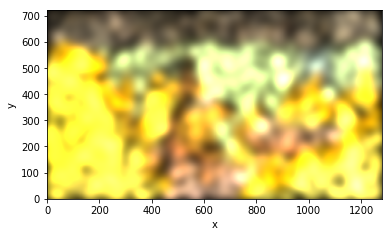

In [33]:
pk = pd.kde(x=1000, y=1000, bw=20, density=False, kernel='gaussian')
pk['img'] /= np.max(pk['img']) / 2
#pk['img_exp'] = np.exp(pk['img'])
#pk['img_exp'] /= np.max(pk['img_exp'])
pk.plot('img')

In [34]:
np.arange(12).reshape(3,4)[..., np.newaxis]

array([[[ 0],
        [ 1],
        [ 2],
        [ 3]],

       [[ 4],
        [ 5],
        [ 6],
        [ 7]],

       [[ 8],
        [ 9],
        [10],
        [11]]])

In [35]:
pk

y \ x,[0.007 1.286],[1.286 2.565],[2.565 3.844],[3.844 5.123],[5.123 6.402],[6.402 7.681],...,[1271.295 1272.574],[1272.574 1273.853],[1273.853 1275.132],[1275.132 1276.411],[1276.411 1277.689],[1277.689 1278.968]
[0.006 0.727],img = [0.347 0.314 0.095]counts = 0.00302,img = [0.368 0.333 0.101]counts = 0.0032,img = [0.389 0.352 0.107]counts = 0.00339,img = [0.41 0.372 0.113]counts = 0.00357,img = [0.432 0.391 0.119]counts = 0.00376,img = [0.454 0.411 0.125]counts = 0.00395,...,img = [0.383 0.356 0.143]counts = 0.00354,img = [0.362 0.337 0.135]counts = 0.00334,img = [0.341 0.317 0.127]counts = 0.00314,img = [0.32 0.298 0.12 ]counts = 0.00294,img = [0.3 0.28 0.112]counts = 0.00275,img = [0.28 0.261 0.105]counts = 0.00256
[0.727 1.448],img = [0.357 0.324 0.098]counts = 0.00311,img = [0.379 0.343 0.104]counts = 0.0033,img = [0.4 0.363 0.11 ]counts = 0.00349,img = [0.422 0.382 0.116]counts = 0.00368,img = [0.444 0.402 0.122]counts = 0.00387,img = [0.467 0.423 0.129]counts = 0.00407,...,img = [0.395 0.368 0.148]counts = 0.00365,img = [0.373 0.348 0.14 ]counts = 0.00344,img = [0.352 0.328 0.132]counts = 0.00324,img = [0.331 0.308 0.124]counts = 0.00303,img = [0.31 0.289 0.116]counts = 0.00284,img = [0.29 0.27 0.109]counts = 0.00264
[1.448 2.169],img = [0.368 0.333 0.101]counts = 0.0032,img = [0.39 0.353 0.107]counts = 0.0034,img = [0.412 0.373 0.113]counts = 0.00359,img = [0.434 0.393 0.119]counts = 0.00378,img = [0.457 0.414 0.126]counts = 0.00398,img = [0.48 0.435 0.132]counts = 0.00418,...,img = [0.407 0.379 0.152]counts = 0.00377,img = [0.385 0.358 0.144]counts = 0.00355,img = [0.363 0.338 0.136]counts = 0.00334,img = [0.341 0.318 0.128]counts = 0.00313,img = [0.32 0.298 0.12 ]counts = 0.00293,img = [0.299 0.279 0.112]counts = 0.00273
[2.169 2.89 ],img = [0.379 0.343 0.104]counts = 0.0033,img = [0.401 0.364 0.11 ]counts = 0.0035,img = [0.424 0.384 0.116]counts = 0.0037,img = [0.447 0.405 0.123]counts = 0.0039,img = [0.47 0.426 0.129]counts = 0.0041,img = [0.494 0.447 0.136]counts = 0.0043,...,img = [0.42 0.39 0.157]counts = 0.00388,img = [0.397 0.369 0.148]counts = 0.00366,img = [0.374 0.349 0.14 ]counts = 0.00344,img = [0.352 0.328 0.132]counts = 0.00322,img = [0.33 0.308 0.124]counts = 0.00302,img = [0.308 0.288 0.116]counts = 0.00281
[2.89 3.611],img = [0.39 0.353 0.107]counts = 0.00339,img = [0.412 0.374 0.113]counts = 0.00359,img = [0.436 0.395 0.119]counts = 0.0038,img = [0.459 0.416 0.126]counts = 0.004,img = [0.483 0.437 0.133]counts = 0.00421,img = [0.507 0.459 0.139]counts = 0.00442,...,img = [0.432 0.402 0.161]counts = 0.00399,img = [0.409 0.38 0.153]counts = 0.00376,img = [0.385 0.359 0.144]counts = 0.00354,img = [0.362 0.338 0.136]counts = 0.00332,img = [0.34 0.317 0.128]counts = 0.00311,img = [0.318 0.297 0.119]counts = 0.0029
[3.611 4.333],img = [0.4 0.362 0.109]counts = 0.00348,img = [0.423 0.383 0.116]counts = 0.00369,img = [0.447 0.405 0.123]counts = 0.0039,img = [0.471 0.427 0.129]counts = 0.00411,img = [0.495 0.449 0.136]counts = 0.00432,img = [0.52 0.471 0.143]counts = 0.00453,...,img = [0.444 0.413 0.166]counts = 0.0041,img = [0.42 0.391 0.157]counts = 0.00387,img = [0.396 0.369 0.149]counts = 0.00364,img = [0.373 0.348 0.14 ]counts = 0.00342,img = [0.35 0.326 0.131]counts = 0.0032,img = [0.327 0.305 0.123]counts = 0.00298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
[716.816 717.538],img = [0.086 0.076 0.059]counts = 0.00245,img = [0.09 0.08 0.062]counts = 0.00258,img = [0.095 0.084 0.065]counts = 0.00272,img = [0.099 0.088 0.068]counts = 0.00285,img = [0.103 0.091 0.071]counts = 0.00299,img = [0.108 0.095 0.074]counts = 0.00312,...,img = [0.116 0.103 0.081]counts = 0.00307,img = [0.108 0.096 0.075]counts = 0.00288,img = [0.1 0.09 0.07]counts = 0.0027,img = [0.093 0.083 0.064]counts = 0.00253,img = [0.086 0.077 0.059]counts = 0.00236,img = [0.08 0.071 0.055]counts = 0.00219
[717.538 718.259],img = [0.083 0.074 0.057]counts = 0.00239,img = [0.088 0.077 0.06 ]counts = 0.00252,img = [0.092 0.081 0.0

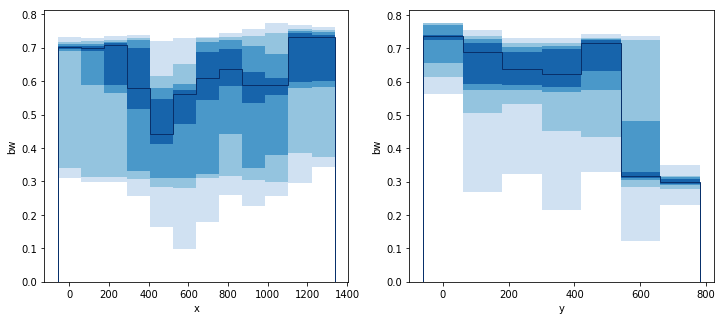

In [36]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw', ax=ax[0])
g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], y=0.01).plot_bands('bw', ax=ax[1])

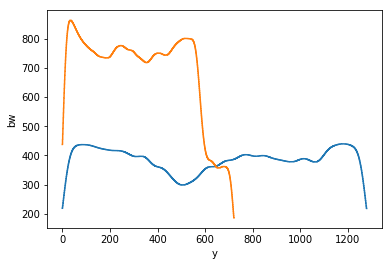

In [37]:
#g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw')
g.kde(x=1000, density=False).plot('bw')
g.kde(y=1000, density=False).plot('bw')

In [38]:
g['img'].shape

(1280, 722, 3)

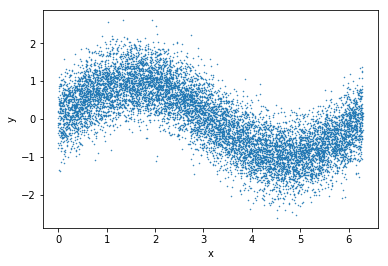

In [60]:
p = pn.PointData()
p['x'] = np.random.rand(10000) * 2 * np.pi
p['y'] = np.sin(p['x']) + np.random.randn(p.array_shape[0]) * 0.5
p.plot('.', ms=1)

In [61]:
p['density'] = p.histogram(x=10, y=10).interp(x=100, y=100).lookup(p)['counts']

In [62]:
p

x,3.77,3.85,5.33,4.52,1.91,3.45,...,0.646,1.5,2.06,0.449,3.35,5.49
y,-0.941,-1.01,-1.45,-1.13,0.256,-0.189,...,-0.192,0.126,0.944,-0.634,0.212,-0.971
density,309,298,194,385,182,355,...,136,115,404,52.9,260,329


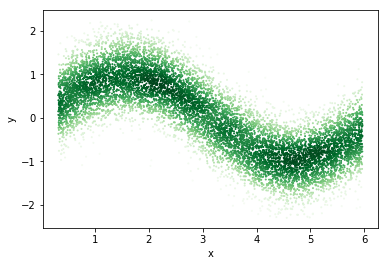

In [64]:
p.plot_scatter('x', 'y', 'density', s=1, cmap='Greens')

/home/peller/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


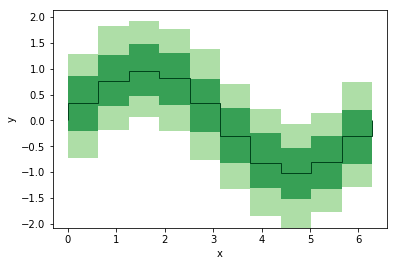

In [65]:
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).plot_bands('y', cmap='Greens')
#p.plot('x', 'y', '.', color='b', ms=1)

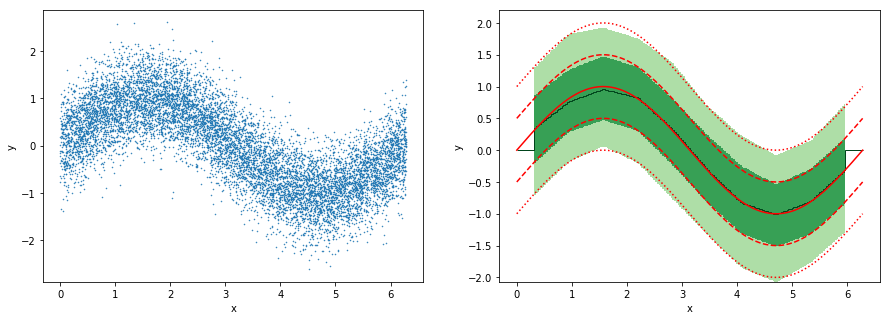

In [66]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

p.plot('x', 'y', '.', ms=1, ax=ax[0])
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).interp(x=200, method='linear', fill_value=np.nan).plot_bands('y', cmap='Greens', ax=ax[1])

# truth
x = np.linspace(0, 2*np.pi, 1000)
ax[1].plot(x, np.sin(x), color='red')
ax[1].plot(x, np.sin(x)+0.5, '--', color='red')
ax[1].plot(x, np.sin(x)-0.5, '--', color='red')
ax[1].plot(x, np.sin(x)+1, ':', color='red')
ax[1].plot(x, np.sin(x)-1, ':', color='red')

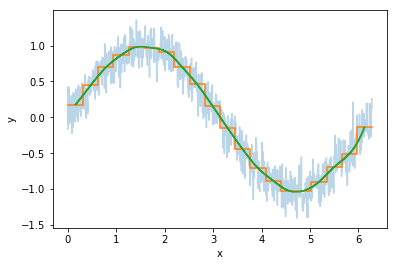

In [68]:
p.binwise(function='mean', x=1000).plot('y', alpha=0.3)
p.binwise(function='mean', x=20).plot('y')
p.binwise(function='mean', x=20).interp(method='cubic', x=1000).plot('y')

In [69]:
s = pn.GridData()
s.grid['x'].points = np.linspace(0, 3 * np.pi, 20)
s.grid['y'].points = np.linspace(0, 3 * np.pi, 20)
s['z'] = np.cos(s['x']) * np.cos(s['y'])

needs to be checked, is weird behaviour
needs to be checked, is weird behaviour


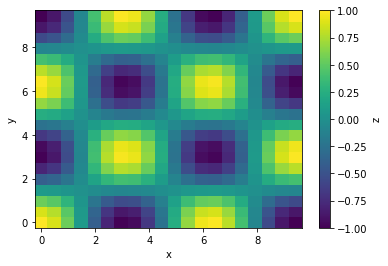

In [70]:
s.plot(cbar=True)

In [71]:
s['z']

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,1,0.879,0.547,0.0826,-0.402,-0.789,...,0.789,0.402,-0.0826,-0.547,-0.879,-1
0.496,0.879,0.773,0.481,0.0726,-0.353,-0.694,...,0.694,0.353,-0.0726,-0.481,-0.773,-0.879
0.992,0.547,0.481,0.299,0.0452,-0.22,-0.432,...,0.432,0.22,-0.0452,-0.299,-0.481,-0.547
1.49,0.0826,0.0726,0.0452,0.00682,-0.0332,-0.0652,...,0.0652,0.0332,-0.00682,-0.0452,-0.0726,-0.0826
1.98,-0.402,-0.353,-0.22,-0.0332,0.161,0.317,...,-0.317,-0.161,0.0332,0.22,0.353,0.402
2.48,-0.789,-0.694,-0.432,-0.0652,0.317,0.623,...,-0.623,-0.317,0.0652,0.432,0.694,0.789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0.789,0.694,0.432,0.0652,-0.317,-0.623,...,0.623,0.317,-0.0652,-0.432,-0.694,-0.789
7.44,0.402,0.353,0.22,0.0332,-0.161,-0.317,...,0.317,0.161,-0.0332,-0.22,-0.353,-0.402
7.94,-0.0826,-0.0726,-0.0452,-0.00682,0.0332,0.0652,...,-0.0652,-0.0332,0.00682,0.0452,0.0726,0.0826


In [72]:
np.max(s['z'], axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,1,0.879,0.547,0.0826,0.402,0.789,...,0.789,0.402,0.0826,0.547,0.879,1


In [73]:
np.square(s['z'])

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,1,0.773,0.299,0.00682,0.161,0.623,...,0.623,0.161,0.00682,0.299,0.773,1
0.496,0.773,0.598,0.231,0.00527,0.125,0.482,...,0.482,0.125,0.00527,0.231,0.598,0.773
0.992,0.299,0.231,0.0895,0.00204,0.0483,0.186,...,0.186,0.0483,0.00204,0.0895,0.231,0.299
1.49,0.00682,0.00527,0.00204,4.65e-05,0.0011,0.00425,...,0.00425,0.0011,4.65e-05,0.00204,0.00527,0.00682
1.98,0.161,0.125,0.0483,0.0011,0.026,0.1,...,0.1,0.026,0.0011,0.0483,0.125,0.161
2.48,0.623,0.482,0.186,0.00425,0.1,0.388,...,0.388,0.1,0.00425,0.186,0.482,0.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0.623,0.482,0.186,0.00425,0.1,0.388,...,0.388,0.1,0.00425,0.186,0.482,0.623
7.44,0.161,0.125,0.0483,0.0011,0.026,0.1,...,0.1,0.026,0.0011,0.0483,0.125,0.161
7.94,0.00682,0.00527,0.00204,4.65e-05,0.0011,0.00425,...,0.00425,0.0011,4.65e-05,0.00204,0.00527,0.00682


In [74]:
np.sum(s['z'], axis='y')

x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-5.55e-16,-6.66e-16,0,0,5.55e-17,7.77e-16,...,-2.22e-16,-2.22e-16,4.16e-17,4.44e-16,6.66e-16,5.55e-16


In [75]:
np.mean(s['z'], axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-2.78e-17,-3.33e-17,0,-1.39e-18,1.39e-17,2.78e-17,...,-3.33e-17,0,3.47e-18,2.22e-17,3.33e-17,2.78e-17


In [76]:
s['z'].mean(axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-2.78e-17,-3.33e-17,0,-1.39e-18,1.39e-17,2.78e-17,...,-3.33e-17,0,3.47e-18,2.22e-17,3.33e-17,2.78e-17


In [77]:
s['x']

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0.496,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0.992,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
1.49,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
1.98,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
2.48,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
7.44,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
7.94,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42


In [78]:
test = pn.GridData()#x=[0,1,2], y=[0,1,2,3])

In [79]:
test['a'] = np.arange(6).reshape(2,3)
test['b'] = np.zeros_like(test['a'])

adding default grid


In [80]:
test

y \ x,0,1
0,a = 0b = 0,a = 3b = 0
1,a = 1b = 0,a = 4b = 0
2,a = 2b = 0,a = 5b = 0


In [81]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [82]:
test['a'].T

x \ y,0,1,2
0,0,1,2
1,3,4,5


In [83]:
np.mean(test['a'], axis='x')

y,0,1,2
,1.5,2.5,3.5


In [84]:
np.sum(test['b'], axis='x')

y,0,1,2
,0,0,0


In [85]:
np.square(test['a'])

y \ x,0,1
0,0,9
1,1,16
2,4,25


In [86]:
np.max(test['a'], axis='x')

y,0,1,2
,3,4,5


In [87]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [88]:
test['a'][test['x'] > 1]

y \ x,0,1
0,--,--
1,--,--
2,--,--


In [89]:
test.grid['x'].edges

edges: array([[-0.5,  0.5],
       [ 0.5,  1.5]])

In [90]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [91]:
test['a'][test['x'] >= test['y']] + test['a']

y \ x,0,1
0,0,6
1,--,8
2,--,--


In [92]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [93]:
#(test['a'] + 
(test['a'][test['x'] == test['y']])

y \ x,0,1
0,0,--
1,--,4
2,--,--


In [94]:
np.sum(test['a'][test['x'] == test['y']])

4

In [95]:
test['a'] + test['a'][test['a'] > 3] * 3.

y \ x,0,1
0,--,--
1,--,16
2,--,20


In [96]:
test['a'][test['a'] > 3] += test['a'][test['a'] > 4] 

In [97]:
test['a'] *= -1

In [98]:
test['a']

y \ x,0,1
0,0,-3
1,-1,-4
2,-2,-10


In [99]:
test['a'][0,:] *= -1

In [100]:
test['a']

y \ x,0,1
0,0,-3
1,1,-4
2,2,-10


In [101]:
(test['a'].data * 300)

array([[    0,   300,   600],
       [ -900, -1200, -3000]])

In [102]:
test['a'] ** 2

y \ x,0,1
0,0,9
1,1,16
2,4,100


In [103]:
str(test['a'][0])
test['a'][0].shape
test['a'].ndim

2

In [104]:
test['a'].grid[0]

Grid(
Axis("y",
points = array([0, 1, 2]),
edges = edges: None)
nbins = 3),)

In [105]:
test['a'][0,[0]]

y,0
,0


In [106]:
test[0,0]

{'a': 0, 'b': 0}

In [107]:
test['a'].data[[0],[0],np.newaxis]

array([[0]])

In [108]:
np.std(test['a'], axis='x')

y,0,1,2
,1.5,2.5,6


In [109]:
np.sum(test['a'])

-14

In [110]:
l = np.arange(10)

In [111]:
l

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [112]:
mask = l > 5

In [113]:
mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [114]:
['%s'%s for s in np.asanyarray(np.ma.MaskedArray(l, mask))]

['0', '1', '2', '3', '4', '5', '--', '--', '--', '--']

In [115]:
ma = np.ma.MaskedArray(l, mask)

In [116]:
(-np.ones(10) * np.asanyarray(ma)).data

array([-0., -1., -2., -3., -4., -5., -1., -1., -1., -1.])

In [117]:
np.array(ma) * -1

array([ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9])

In [118]:
np.asarray(ma)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
np.asanyarray(ma)

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [120]:
ma.mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [121]:
np.sum(test['a'])

-14

In [122]:
np.sum(ma)

15

In [123]:
ma

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [124]:
axis = (1,)

In [125]:
axis

(1,)

In [126]:
axis[0] = 3

TypeError: 'tuple' object does not support item assignment

In [127]:
any(sorted((1,4,3)) < 3)

TypeError: '<' not supported between instances of 'list' and 'int'

In [128]:
np.arange(12)[:,np.newaxis]

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [129]:
np.arange(12)[:,np.newaxis] @ np.arange(12)[:,np.newaxis].T

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110],
       [  0,  11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121]])

In [130]:
blah=33.000
f'ldasdhadh {blah:.2g} {blah}'

'ldasdhadh 33 33.0'

In [131]:
'test %ff'%{ff:33}

NameError: name 'ff' is not defined